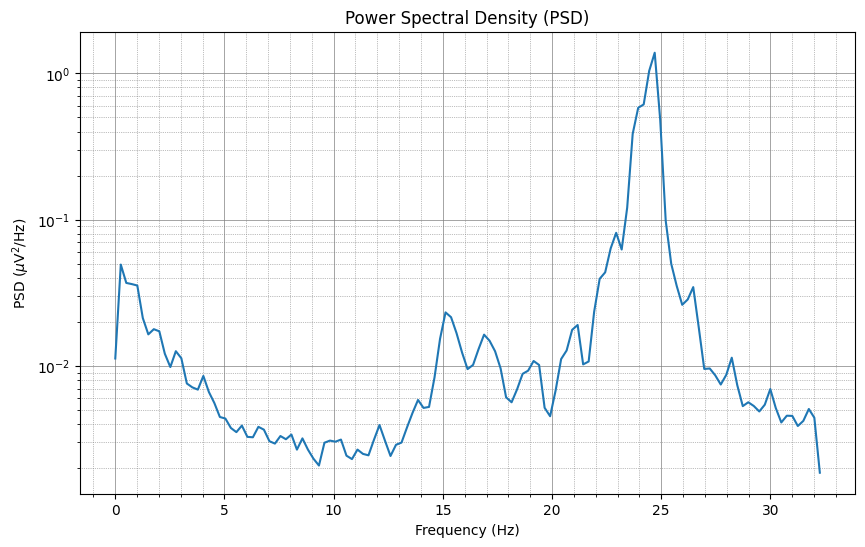

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch

plot_file = '../Data/PSD_Allan_Deviation/Plots/frequency_vs_PSD_180_1hr.png'
data = pd.read_csv('../Data/PSD_Allan_Deviation/Tables/time_vs_vlockin_PSD_180_1hr.csv')
time = data['Time'].values
voltage = data['Vlockin (microvolts)'].values
 
sampling_frequency = 1 / np.mean(np.diff(time))
 
frequencies, psd = welch(voltage, fs = sampling_frequency)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'PSD ($\mu \mathrm{V}^2/\mathrm{Hz}$)')
plt.grid(True)
plt.savefig(plot_file)
plt.show()

In [6]:
data['Vlockin (microvolts)'].median()

486.316

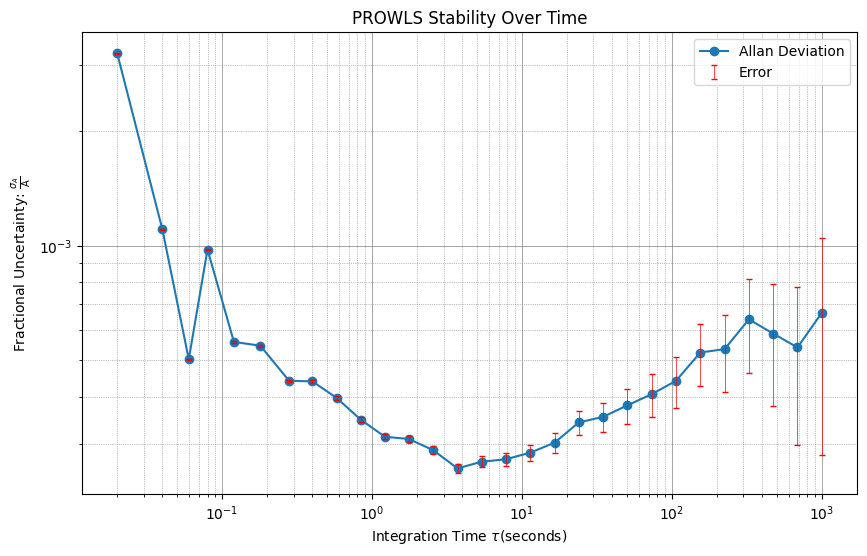

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools

data = pd.read_csv('../Data/PSD_Allan_Deviation/Tables/time_vs_vlockin_PSD_180_1hr.csv')
time = data['Time'].values
voltage_microvolts = data['Vlockin (microvolts)'].values

median = data['Vlockin (microvolts)'].median()
max_tau = 10**3
taus = np.logspace(np.log10(1/50), np.log10(max_tau), num = 30)

tau, allan_deviation, ade, _ = allantools.adev(voltage_microvolts, data_type = 'freq', rate = 50, taus = taus)

plt.figure(figsize=(10, 6))
plt.loglog(tau, allan_deviation / median, marker='o', linestyle='-', label='Allan Deviation')
plt.errorbar(x=tau, y=allan_deviation / median, yerr=ade / median, fmt='none', ecolor='r', elinewidth=0.5, capsize=2, label='Error')
plt.title('PROWLS Stability Over Time')
plt.xlabel(r'Integration Time ${\tau} {\text{(seconds)}}$')
plt.ylabel(r'Fractional Uncertainty: $\frac{\sigma_A} {\text{A}}$')
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.legend()
plt.savefig('../Data/PSD_Allan_Deviation/Plots/allan_variance_180_1hr.png')
plt.show()

In [13]:
max_tau

232.308

In [29]:
ade

array([0.00323708, 0.00111299, 0.00051195, 0.00098387, 0.00045419,
       0.00055721, 0.00059512, 0.00043332, 0.00055175, 0.00046402,
       0.00044101, 0.00050185, 0.00045125, 0.00044892, 0.00044775,
       0.00041496, 0.0004046 , 0.00039704, 0.00039336, 0.00038894,
       0.00037943, 0.00036132, 0.00035298, 0.0003407 , 0.00033077,
       0.0003205 , 0.00031439, 0.00030942, 0.00030784, 0.00030671,
       0.0003041 , 0.00030134, 0.00029802, 0.00029448, 0.00028949,
       0.00028519, 0.00028082, 0.00027742, 0.00027472, 0.00027297,
       0.00027239, 0.00027256, 0.00027409, 0.00027665, 0.00028005,
       0.00028479, 0.00029038, 0.00029656, 0.00030296, 0.00030943,
       0.00031573, 0.00032173, 0.00032785, 0.00033413, 0.00034007,
       0.00034513, 0.00034962, 0.00035483, 0.00036114, 0.00036858,
       0.00037777, 0.00038964, 0.00040404, 0.00041895, 0.00043288,
       0.00044545, 0.00045673, 0.00046737, 0.00047707, 0.00048748,
       0.00050005, 0.00051449, 0.00053283, 0.0005534 , 0.00057

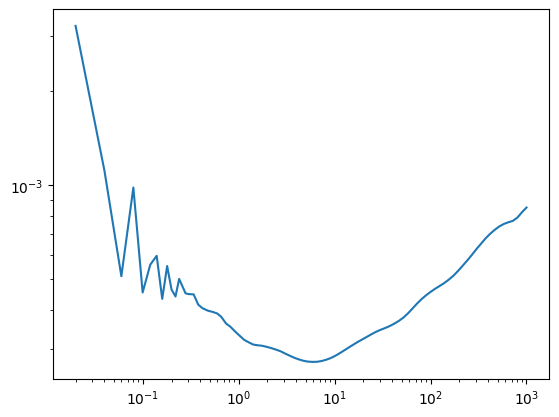

In [30]:
plt.loglog(tau, ade)

In [11]:
import allantools
from allantools import noise
taus = np.logspace(np.log10(1/500), np.log10(max_tau), num = 100)
tau, allan_deviation, _, _ = allantools.oadev(noise.white(10000), rate= 500, data_type= 'freq', taus= taus)
plt.figure(figsize=(10, 6))
plt.loglog(tau, allan_deviation, marker='o', linestyle='-')
plt.title('White Noise')
plt.xlabel('Tau (s)')
plt.ylabel('Allan Deviation (microvolts)')
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for *: 'builtin_function_or_method' and 'float'

In [ ]:
data = pd.read_csv('../Data/PSD/Tables/time_vs_vlockin_PSD_180_1hr.csv')
time = data['Time'].values
voltage_microvolts = data['Vlockin (microvolts)'].values

max_tau = len(voltage_microvolts) / (2 * 500)
taus = np.logspace(np.log10(1/500), np.log10(max_tau), num = 100)



tau, allan_deviation, _, _ = allantools.adev(voltage_microvolts, data_type = 'freq', rate = 500, taus = taus)
plt.figure(figsize=(10, 6))
plt.loglog(tau, allan_deviation, marker='o', linestyle='-')
plt.title('Allan Deviation Plot')
plt.xlabel('Tau (s)')
plt.ylabel('Allan Deviation (microvolts)')
plt.grid(True)
plt.savefig('../Data/PSD/Plots/allan_variance_180_1hr.png')
plt.show()

In [9]:
taus

array([2.00000000e-03, 2.33720259e-03, 2.73125798e-03, 3.19175161e-03,
       3.72988507e-03, 4.35874853e-03, 5.09363918e-03, 5.95243335e-03,
       6.95602133e-03, 8.12881554e-03, 9.49934438e-03, 1.11009462e-02,
       1.29725801e-02, 1.51597739e-02, 1.77157314e-02, 2.07026267e-02,
       2.41931164e-02, 2.82721072e-02, 3.30388211e-02, 3.86092091e-02,
       4.51187718e-02, 5.27258552e-02, 6.16155028e-02, 7.20039564e-02,
       8.41439168e-02, 9.83306902e-02, 1.14909372e-01, 1.34283241e-01,
       1.56923570e-01, 1.83381087e-01, 2.14299376e-01, 2.50430528e-01,
       2.92653440e-01, 3.41995189e-01, 3.99656022e-01, 4.67038545e-01,
       5.45781849e-01, 6.37801376e-01, 7.45335515e-01, 8.71000048e-01,
       1.01785179e+00, 1.18946292e+00, 1.39000791e+00, 1.62436504e+00,
       1.89823509e+00, 2.21827999e+00, 2.59228487e+00, 3.02934746e+00,
       3.54009937e+00, 4.13696471e+00, 4.83446232e+00, 5.64955893e+00,
       6.60208189e+00, 7.71520146e+00, 9.01599442e+00, 1.05361028e+01,
      

In [10]:
tau

array([2.00000e-03, 4.00000e-03, 6.00000e-03, 8.00000e-03, 1.00000e-02,
       1.20000e-02, 1.60000e-02, 1.80000e-02, 2.00000e-02, 2.40000e-02,
       2.80000e-02, 3.40000e-02, 3.80000e-02, 4.60000e-02, 5.20000e-02,
       6.20000e-02, 7.20000e-02, 8.40000e-02, 9.80000e-02, 1.14000e-01,
       1.34000e-01, 1.56000e-01, 1.84000e-01, 2.14000e-01, 2.50000e-01,
       2.92000e-01, 3.42000e-01, 4.00000e-01, 4.68000e-01, 5.46000e-01,
       6.38000e-01, 7.46000e-01, 8.72000e-01, 1.01800e+00, 1.19000e+00,
       1.39000e+00, 1.62400e+00, 1.89800e+00, 2.21800e+00, 2.59200e+00,
       3.03000e+00, 3.54000e+00, 4.13600e+00, 4.83400e+00, 5.65000e+00,
       6.60200e+00, 7.71600e+00, 9.01600e+00, 1.05360e+01, 1.23120e+01,
       1.43880e+01, 1.68140e+01, 1.96500e+01, 2.29620e+01, 2.68340e+01,
       3.13580e+01, 3.66440e+01, 4.28240e+01, 5.00440e+01, 5.84800e+01,
       6.83400e+01, 7.98620e+01, 9.33280e+01, 1.09062e+02, 1.27450e+02,
       1.48938e+02, 1.74050e+02, 2.03396e+02])